# import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from scipy import stats
import seaborn as sns

# insert the data set

In [2]:

import types

from botocore.client import Config
import ibm_boto3


def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fa6831a6cc2d405eb065ad81dabbbefe = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vPm9F-SwiP7sHHsOPc6a5t_ru7FgJuLou4GhbYsvqlBo',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fa6831a6cc2d405eb065ad81dabbbefe.get_object(Bucket='predictinglifeexpectancywithpytho-donotdelete-pr-uanwvyo43smtwn',Key='datasets_12603_17232_Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df = df.drop('Year', axis = 1)           # drop the year column

replaceing developed countries with 1 and developing with 0

In [4]:
status = pd.get_dummies(df.Status)

In [5]:
df = pd.concat([df, status], axis = 1)

In [6]:
df = df.drop(['Status'], axis=1)   #drop the status column

# Data preprocessing
filling missing values with mean of the data of that column of country

In [7]:
df.fillna(value = df.mean(), inplace = True)

grouping the data by countries

In [8]:
df = df.groupby('Country').mean()          

generating heat map

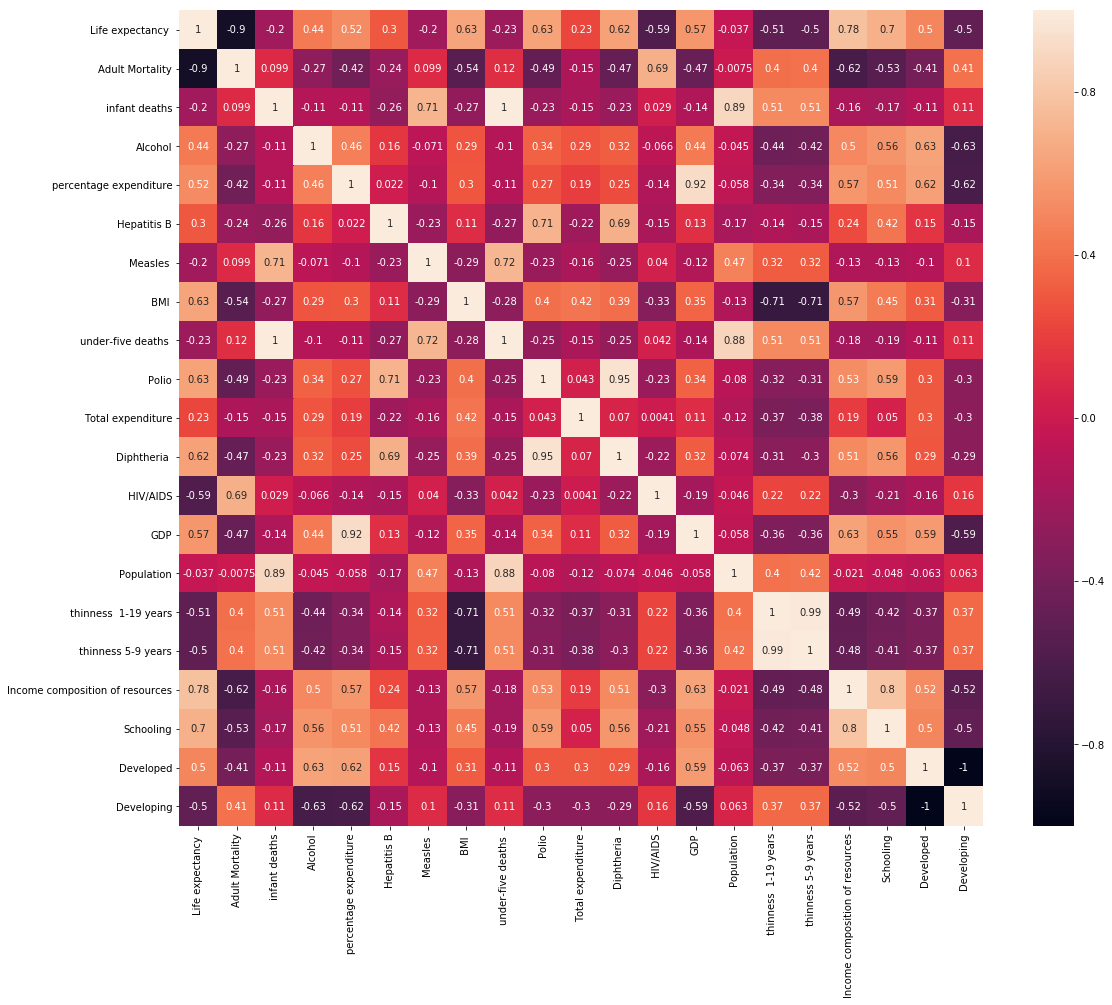

In [9]:
plt.figure(figsize = (18, 15))
sns.heatmap(df.corr(), annot = True)

breaking data in features  

In [10]:
y = df['Life expectancy ']                          #form y 

In [11]:
X = df.drop('Life expectancy ', axis = 1)           #form X, the given set

break the data set in X_train and X_test.
X_train will be used to train our algorithm.
X_test will be used to find how well does our algorithm fit

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

# linear regression
training the linear model

In [13]:
linear_model = LinearRegression()

In [14]:
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print('R_square score on the training: %.2f' % linear_model.score(X_train, y_train))

R_square score on the training: 0.93


testing our model

In [16]:
linear_model_predict = linear_model.predict(X_test)

In [17]:
print('Coefficients: \n', linear_model.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(y_test, linear_model_predict))

Coefficients: 
 [-4.85098142e-02  5.15131805e-02  1.64221547e-01  4.26859388e-04
 -6.85480048e-02 -2.63341952e-05  4.89794350e-02 -4.14027717e-02
  1.12765211e-02  6.86175746e-02  8.87026938e-02 -1.56815429e-01
  4.38164006e-05  1.05551700e-08  2.85879785e-02 -7.54811108e-02
  9.80484359e+00  1.33010528e-01 -3.99042351e-01  3.99042351e-01]
Mean squared error: 7.86
Mean absolute error: 2.28
R_square score: 0.89


Plotting predicted vs y_test

# prediction model graphs

Text(0, 0.5, 'linear_model_predict')

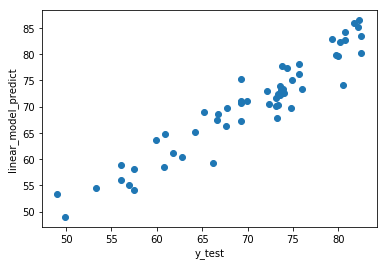

In [18]:
plt.scatter(y_test, linear_model_predict)
plt.xlabel('y_test')
plt.ylabel('linear_model_predict')

In [19]:
!pip install watson-machine-learning-client

In [20]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-15 11:29:40,359 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [24]:
wml_credentials={
  "apikey": "eLyezeeEBB5M9k32oSC70K1HCKIdPkiYCs8dR-gTBSJ1",
  "instance_id": "b967c41c-d8f3-416b-832a-64cb805a73a0",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [26]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [27]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME: "ARSHID",
    client.repository.ModelMetaNames.AUTHOR_EMAIL: "bhatarshid1000@gmail.com",
    client.repository.ModelMetaNames.NAME: "Predicting Life Expectancy"
}

In [28]:
model_artifact = client.repository.store_model(linear_model,meta_props = model_props)

In [29]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [30]:
published_model_uid

'a42b2840-20d1-4d8d-80f8-0236987b329d'

In [31]:
deployment = client.deployments.create(published_model_uid, name = "Predicting life expectancy")



#######################################################################################

Synchronous deployment creation for uid: 'a42b2840-20d1-4d8d-80f8-0236987b329d' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='5abb7fef-c6e8-48dd-ba7f-9b3e5c8f699a'
------------------------------------------------------------------------------------------------




In [32]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [33]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/b967c41c-d8f3-416b-832a-64cb805a73a0/deployments/5abb7fef-c6e8-48dd-ba7f-9b3e5c8f699a/online'